# 1 サンプルデータの取得・前処理

## 1.1 データの取得

In [1]:
from tensorflow.keras import utils
utils.set_random_seed(0)

In [2]:
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()
# data

In [3]:
(x_train, y_train), (x_test, y_test) = data

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0 255
0 9
0 255
0 9


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
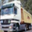

In [6]:
x_train[1]

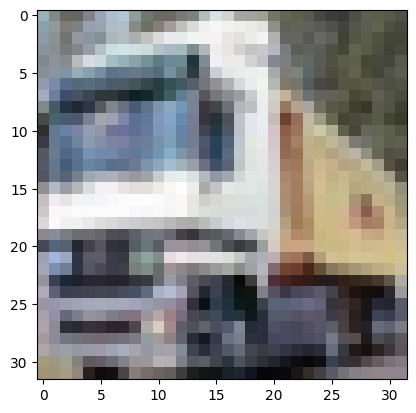

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [8]:
y_train[1]

array([9], dtype=uint8)

## 1.2 データの前処理

In [9]:
# スケーリング
x_train = x_train / 255
x_test = x_test / 255

In [10]:
# One-hot
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

# 2 CNN構造の定義


## 2.1 各層の定義

- 畳み込み層1 \
`model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))`  
畳み込み層の深さ:64 \
フィルタサイズ：3x3 \
ストライド:1(デフォルトのため指定せず) \
ゼロパディング：適用(引数にsameと入力) \
活性化関数：ReLu \
入力層：32x32x3 \

- プーリング層1 \
`model.add(MaxPooling2D(pool_size=(2, 2)))`  
フィルタサイズ：2x2 \
ストライド:2(デフォルトのため指定せず) \

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D

In [12]:
def exec_model_fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1):
    utils.set_random_seed(0)
    model = Sequential()

    # 畳み込み層1
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

    # プーリング層1
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 畳み込み層2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

    # プーリング層2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3次元から1次元化
    model.add(Flatten())

    # 全結合層1
    model.add(Dense(120, activation='relu'))

    # 全結合層2
    model.add(Dense(84, activation='relu'))

    # 出力層
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
    model.summary()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
    return model, history

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_result(df):
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))  # 1行2列のサブプロットを作成
    sns.lineplot(data=df[['loss', 'val_loss']], ax=axes[0])  # 1番目のサブプロットにlossとval_lossの折れ線グラフを描画
    sns.lineplot(data=df[['accuracy', 'val_accuracy']], ax=axes[1])  # 2番目のサブプロットにaccuracyとval_accuracyの折れ線グラフを描画
    plt.show()

## 2.2 エポック数=10

In [14]:
model,  history = exec_model_fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 120)               9

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9150 - accuracy: 0.7185


[0.9149644374847412, 0.718500018119812]

In [16]:
import pandas as pd
df = pd.DataFrame(history.history)

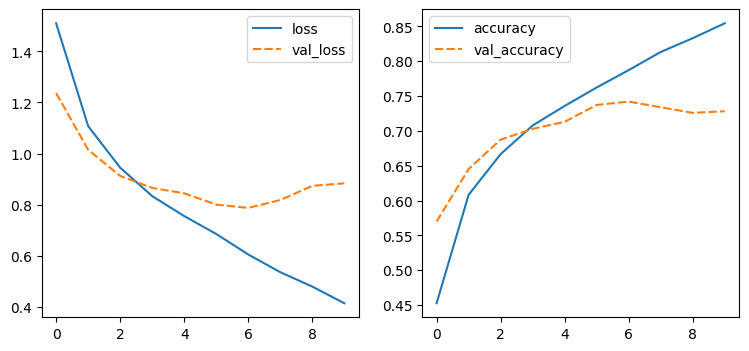

In [17]:
plot_result(df)

## 2.3 エポック数=5に変更

In [18]:
model,  history = exec_model_fit(x_train, y_train,batch_size=128, epochs=5, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8429 - accuracy: 0.7074


[0.8429208993911743, 0.7074000239372253]

# 3 未知のデータの予測

In [20]:
from tensorflow.keras.preprocessing.image import load_img

In [21]:
def predict_img(unknown_img):
    from tensorflow.keras.preprocessing.image import img_to_array
    unknown_array = img_to_array(unknown_img)
    unknown_array = unknown_array / 255
    unknown_array = unknown_array.reshape((1, 32, 32, 3))
    result = model.predict(unknown_array)
    sns.barplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y=result[0])

## 3.1テキストで用意されている画像データ

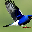

In [22]:
unknown_img = load_img('/content/unknown_cifar.jpg', target_size=(32, 32))
unknown_img

1/1 [==============================] - 0s 278ms/step


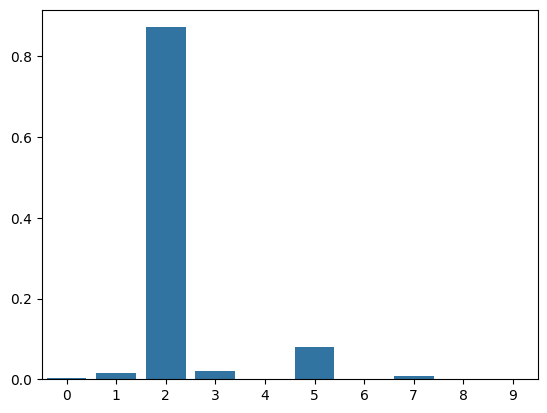

In [23]:
predict_img(unknown_img)

## 3.2 他の画像データの予測

### 3.2.1 猫

ラベル３が猫であり、3である確率が最も高い結果となった

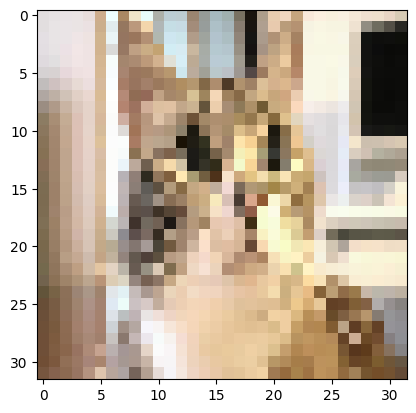

In [24]:
cat_img = load_img('/content/cat.jpeg', target_size=(32, 32))
plt.imshow(cat_img)

1/1 [==============================] - 0s 27ms/step


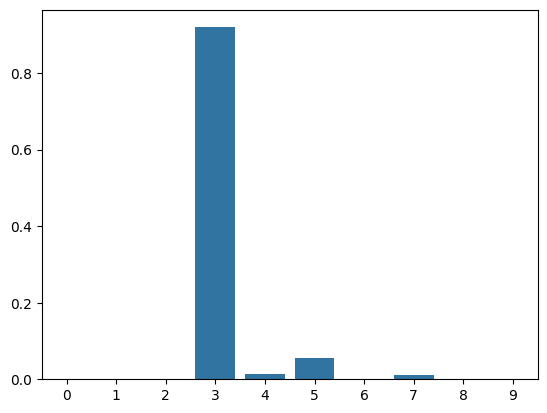

In [25]:
predict_img(cat_img)

In [26]:
plane_img = load_img('/content/plane.png', target_size=(32, 32))

### 3.2.2 鹿

鹿であるラベル4が最も確率が高くなっている。


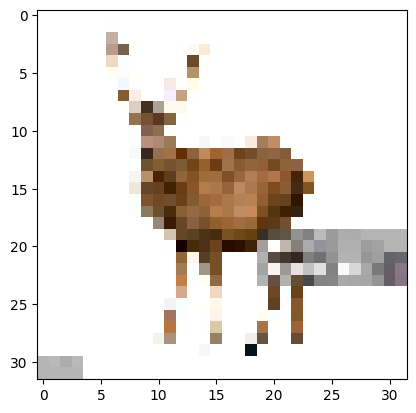

In [27]:
deer_img = load_img('/content/deer.jpg', target_size=(32, 32))
plt.imshow(deer_img)

1/1 [==============================] - 0s 21ms/step


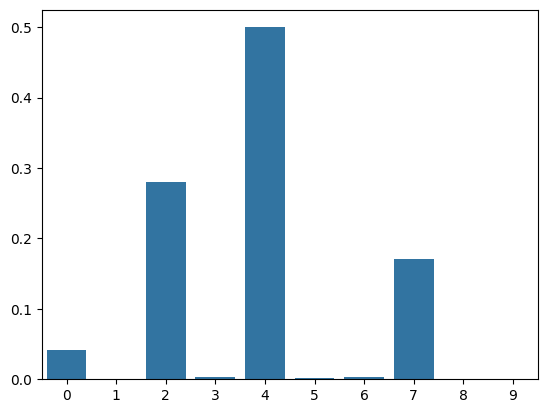

In [28]:
predict_img(deer_img)

### 3.2.3 飛行機

飛行機であるラベル0が最も確率が高くなっている。


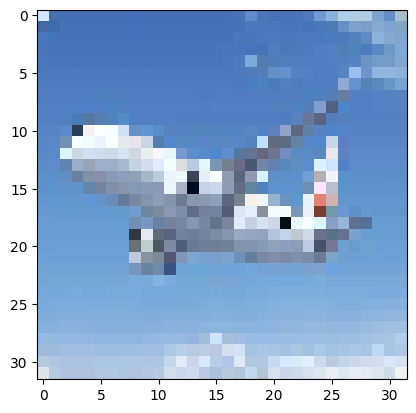

In [29]:
plane_img = load_img('/content/plane.jpeg', target_size=(32, 32))
plt.imshow(plane_img)

1/1 [==============================] - 0s 17ms/step


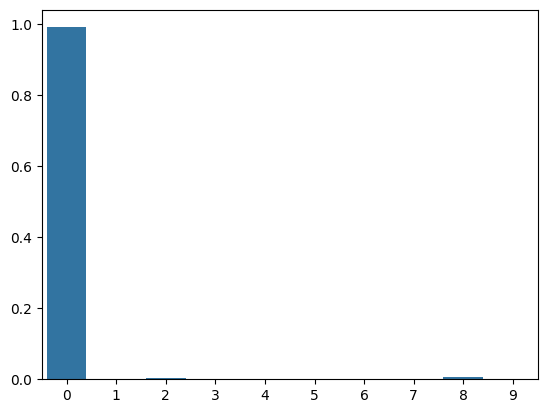

In [30]:
predict_img(plane_img)